In [2]:
pip install Src

  Using cached src-0.0.7.zip (6.3 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build Src
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Building wheel for Src (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [71 lines of output]
      C:\Users\bhupe\AppData\Local\Temp\pip-build-env-h4z05olq\overlay\Lib\site-packages\setuptools\_distutils\dist.py:289: UserWarning: Unknown distribution option: 'tests_require'
        warnings.warn(msg)
      running bdist_wheel
      running build
      running build_py
      creating build\lib\src
      copying src\__init__.py -> build\lib\src
      running egg_info
      writing src.egg-info\PKG-INFO
      writing dependency_links to src.egg-info\dependency_links.txt
      writing requirements to src.egg-info\requires.txt
      writing top-level names to src.egg-info\top_level.txt
      reading manifest file 'src.egg-info\SOURCES.txt'
      reading manifest template 'MANIFEST.in'
      adding license file 'LICENSE.rst'
      writing manifest file 'src.egg-info\SOURCES.txt'
      Traceback (most recent call last):
        Fil

In [4]:
import sys
import os

# Add project src folder to path
sys.path.append(os.path.abspath("../src"))   # agar notebook "notebooks/" ke andar hai


In [6]:
import sys, os
sys.path.append(os.path.abspath("src"))


In [10]:
pip install yfinance

  Using cached multitasking-0.0.12.tar.gz (19 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached peewee-3.18.2.tar.gz (949 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached beautifulsoup4-4.13.5-py3-none-any.whl.metadata (3.8 kB)
  Using cached curl_cffi-0.13.0-cp39-abi3-win_amd64.whl.metadata (13 kB)
  Using cached soupsieve-2.8-py3-none-any.whl.metadata (4.6 kB)
Using cached beautifulsoup4-4.13.5-p


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from data_utils import download_ticker, prepare_close_csv, train_test_split_ts


In [12]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd


In [16]:
DATA_DIR = Path("data")
RAW = DATA_DIR/"raw"; PROC = DATA_DIR/"processed"
RAW.mkdir(parents=True, exist_ok=True)
PROC.mkdir(parents=True, exist_ok=True)


In [17]:
ticker = "RELIANCE.NS"
raw_csv_path, raw_df = download_ticker(ticker=ticker, start="2015-01-01")
proc_path, close_df = prepare_close_csv(raw_csv_path)


c:\Users\bhupe\OneDrive\Desktop\time_series_stock_project\src\data_utils.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end, progress=False)
c:\Users\bhupe\OneDrive\Desktop\time_series_stock_project\src\data_utils.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(raw_csv_path, parse_dates=True, index_col=0)


In [18]:
close_df['close'] = pd.to_numeric(close_df['close'], errors='coerce')
close_df = close_df.dropna()

print("Saved processed:", proc_path)
print(close_df.head())


Saved processed: data\processed\RELIANCE.NS_close.csv
                 close
Price                 
2015-01-01  189.999817
2015-01-02  189.496948
2015-01-05  187.421280
2015-01-06  178.915268
2015-01-07  182.809830


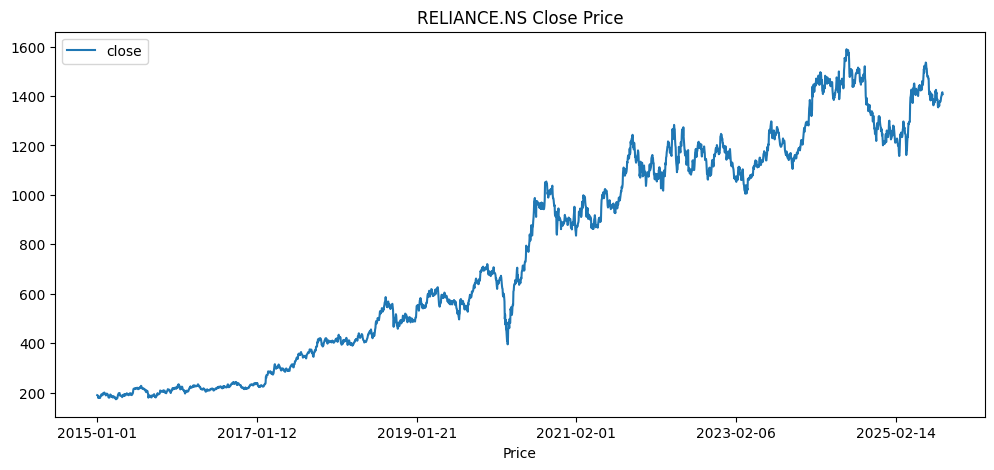

In [19]:
close_df.plot(title=f"{ticker} Close Price", figsize=(12,5))
plt.show()

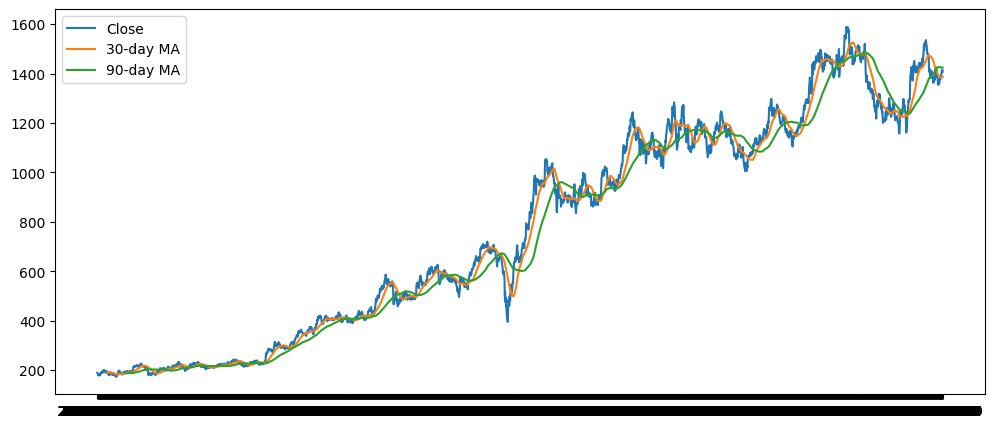

In [20]:
plt.figure(figsize=(12,5))
plt.plot(close_df.index, close_df['close'], label='Close')
plt.plot(close_df['close'].rolling(30).mean(), label='30-day MA')
plt.plot(close_df['close'].rolling(90).mean(), label='90-day MA')
plt.legend(); plt.show()

In [21]:
train, test = train_test_split_ts(close_df, test_size=0.2)
print("Train:", train.shape, "Test:", test.shape)

Train: (2118, 1) Test: (530, 1)
